In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pysr import PySRRegressor

In [38]:
def error(data,model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    error = []
    
    for i in range(l):
        error.append(100*abs((data[i] - model[i]) / data[i]))
    
    return np.array(error)

In [39]:
def accuracy(data, model):
    if len(data) != len(model):
        print('ERROR: array must have the same length!')
        return
    
    l = len(data)
    total_error = 0
    
    for i in range(l):
        error = abs((data[i] - model[i]) / data[i])
        total_error += error
    
    avg_error = total_error / l
    accuracy_percentage = 100 * (1 - avg_error)
    
    return accuracy_percentage


In [40]:
model = PySRRegressor()

In [41]:
def bran(x,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(x)
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x,T, s=2, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()


    axs[1].scatter(x,error(T,T_1),s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()

    print('The accuracy of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')


In [42]:
def bran2(x,y,T,alpha):
    a = model.from_file(alpha)
    T_1 = a.predict(y)
    print('Model equation is: ', a.latex())
    fig, axs = plt.subplots(1, 2, figsize=(18, 6))
    axs[0].scatter(x,T, s=2, label='CLASS data')
    axs[0].plot(x[0:114], T_1[0:114], lw=1.5, label='From PySR', color='r')
    axs[0].set_xlabel(r'$x$')
    axs[0].set_ylabel(r'$T(x)$')
    axs[0].set_title('Computed vs SR')
    axs[0].loglog()
    axs[0].grid(True)
    axs[0].legend()


    axs[1].scatter(x,error(T,T_1),s=3)
    axs[1].set_xlabel(r'$x$')
    axs[1].set_ylabel(r'$\frac{|T_{CLASS}(x)-T_{SR}(x)|}{T_{CLASS}(x)}\cdot 100$')
    axs[1].set_title('Error')
    axs[1].grid(True)
    axs[1].loglog()
    
    print('The accuracy of the model is: ',np.round(accuracy(T,T_1),2),'%')
    print('Max percentage error is: ',np.round(np.amax(error(T,T_1)),2),'%')

----
# WITHOUT MASSIVE NEUTRINOS
----

In [43]:
tf = pd.read_csv('TF_16.csv')
k = tf['k (h/Mpc)'].values
z = (tf['k (h/Mpc)']/tf['omega_m']).values
x = tf['x'].values
y = pd.DataFrame({'k': tf['k (h/Mpc)'], 'om_b': tf['omega_b'],'om_m': tf['omega_m']})
T = tf['T(k)'].values
x = x.reshape(-1,1)
z = z.reshape(-1,1)

$$ T(x)=- \frac{1.96}{- \frac{17.4 x^{0.0917}}{\left(\frac{1}{x}\right)^{1.31}} - 1.96}=\frac{1}{1+8.88x^{1.40}} $$

Checking if model3-3108.pkl exists...
Loading model from model3-3108.pkl
Model equation is:  - \frac{1.96}{- \frac{17.4 x^{0.0917}}{\left(\frac{1}{x}\right)^{1.31}} - 1.96}
The accuracy of the model is:  96.16 %
Max percentage error is:  44.87 %


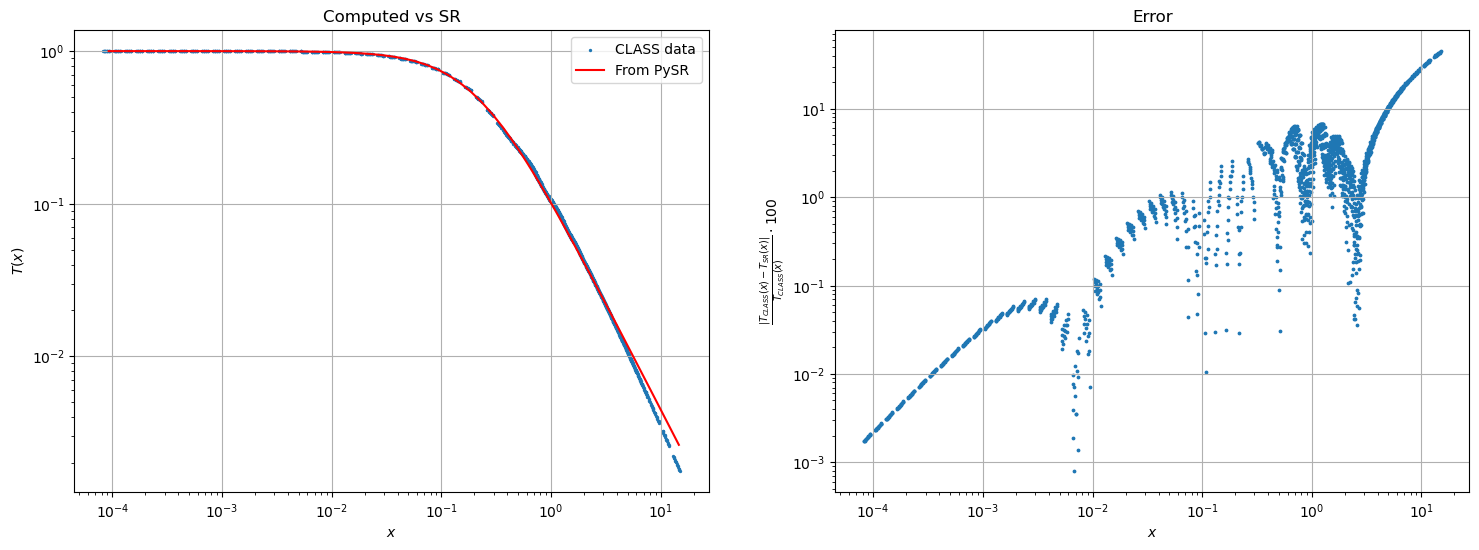

In [44]:
bran(x,T,'model3-3108.pkl')

without using x
$$\frac{1}{11.0 \left(\frac{k}{\omega_{m}}\right)^{1.38} + 1}$$

Checking if model1-0709.pkl exists...
Loading model from model1-0709.pkl
Model equation is:  \frac{om_{m}}{11.0 om_{m} \left(\frac{k}{om_{m}}\right)^{1.38} + om_{m}}
The accuracy of the model is:  94.76 %
Max percentage error is:  62.81 %


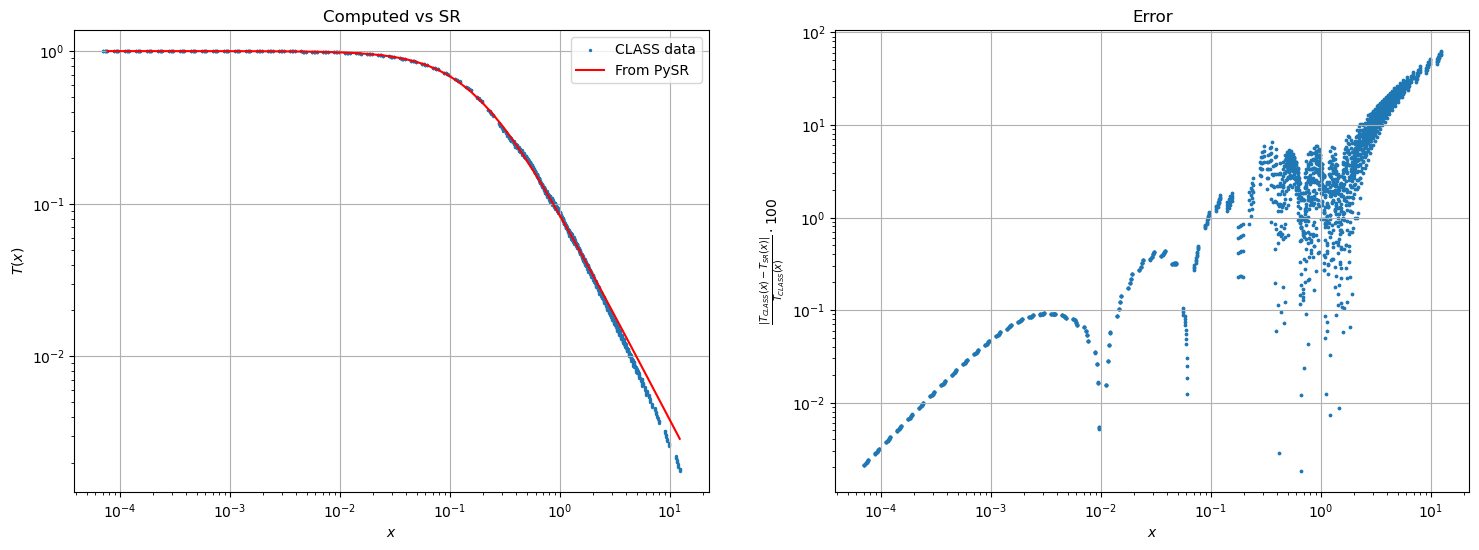

In [45]:
bran2(k/tf['omega_m'],y,T,'model1-0709.pkl')

searching now with
$$z:=\frac{k}{\omega_m}$$
$$- 0.000834^{z} z + \frac{1}{10.76z^{1.48} + 1}$$

Checking if model2-0709.pkl exists...
Loading model from model2-0709.pkl
Model equation is:  - 0.000834^{x_{0}} x_{0} + \frac{0.0928}{x_{0}^{1.48} + 0.0928}
The accuracy of the model is:  97.92 %
Max percentage error is:  26.99 %


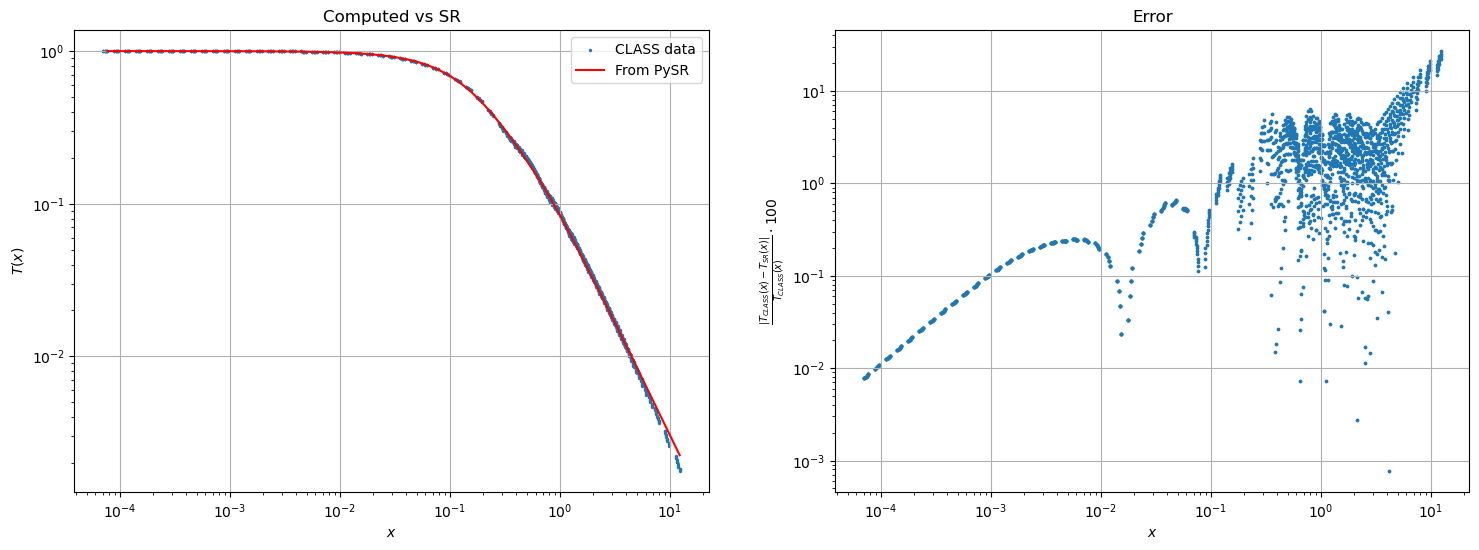

In [46]:
bran(z,T,'model2-0709.pkl')

----
# WITH ONE MASSIVE NEUTRINO
----

$$T(x)=\frac{0.745}{x + 5.19 x^{1.50} + 0.745}$$

In [47]:
tf2 = pd.read_csv('TF_64.csv')
k2 = tf2['k (h/Mpc)'].values
x2 = tf2['x'].values
T2 = tf2['T(k)'].values
x2 = x2.reshape(-1,1)

Checking if model1-nu-3108.pkl exists...
Loading model from model1-nu-3108.pkl
Model equation is:  \frac{0.745}{x + 5.19 x^{1.50} + 0.745}
The accuracy of the model is:  96.34 %
Max percentage error is:  33.7 %


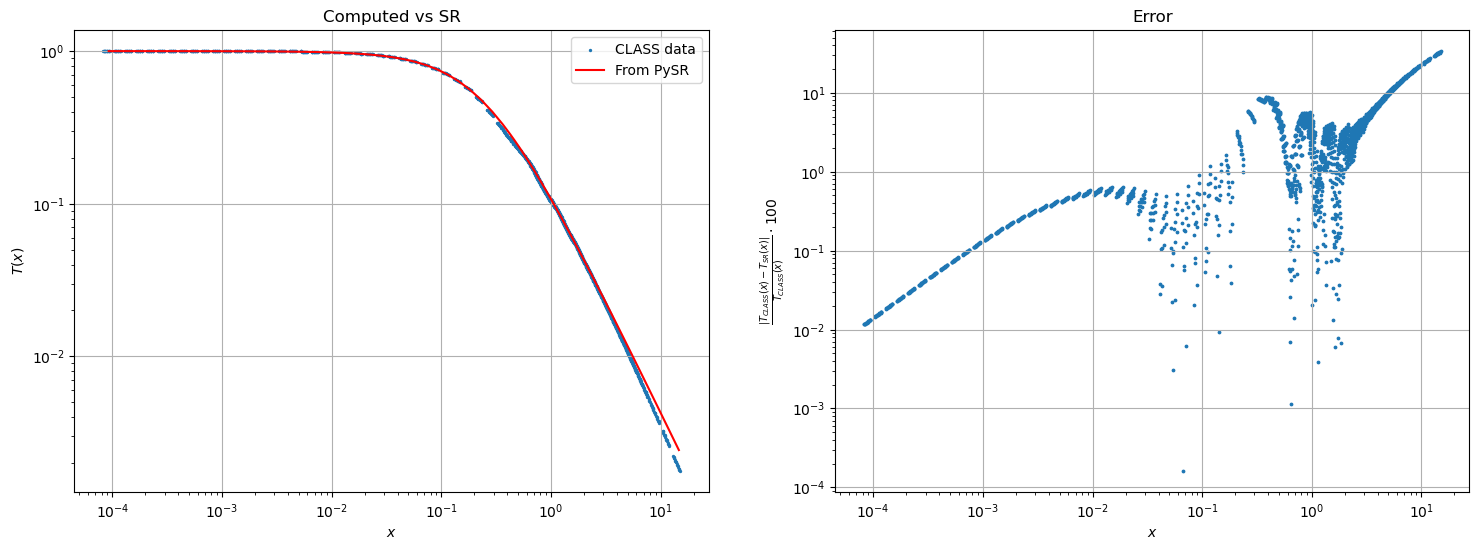

In [48]:
bran(x,T,'model1-nu-3108.pkl')